<a href="https://colab.research.google.com/github/dengue-dashboard/analise-dados-dengue/blob/main/SARIMAmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [ ]:
dados = pd.read_csv('sarima_dengue')


In [ ]:
dados['data_iniSE'] = pd.to_datetime(dados['data_iniSE'])
dados = dados.set_index('data_iniSE')

In [ ]:
t_treino = dados[dados.index<='2019-12-31'].index.values
t_teste = dados[dados.index>='2020-01-01'].index.values
X_treino = dados[dados.index<='2019-12-31'].values
X_teste = dados[dados.index>='2020-01-01'].values

In [ ]:
modelo = sm.tsa.statespace.SARIMAX(dados.casos, order=(3,1,1), seasonal_order=(2,1,1,12))
resultado = modelo.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
X_pred = resultado.predict(start=len(X_treino), end=len(X_treino)+len(X_teste)-1)


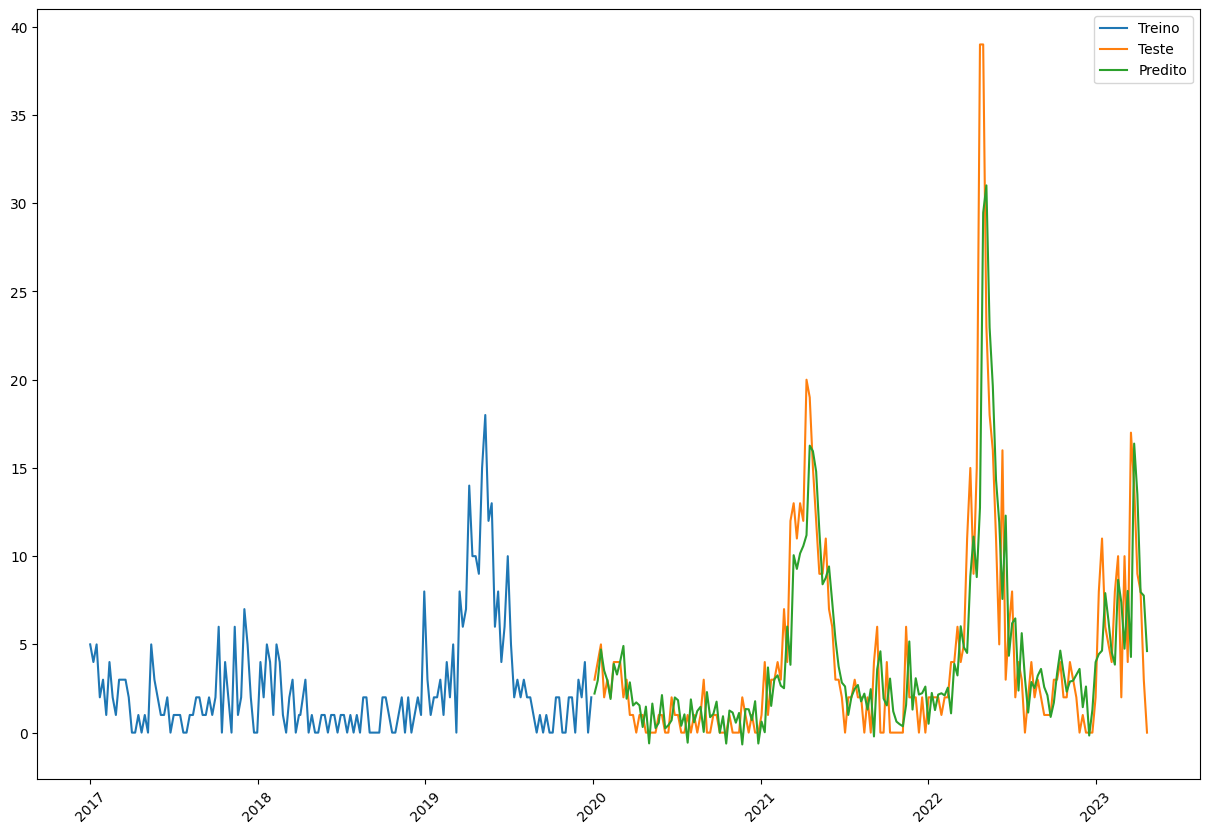

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(t_treino,X_treino,label="Treino")
plt.plot(t_teste,X_teste, label="Teste")
plt.plot(t_teste,X_pred,label="Predito")
plt.xticks(rotation=45)
plt.legend()


In [ ]:
MSE = mean_squared_error(X_teste,X_pred)

In [ ]:
print(MSE)

12.573791590613942


In [ ]:
RMSE = np.sqrt(MSE)

In [ ]:
print("RMSE = {:0.2f}".format(RMSE))


RMSE = 3.55
